## **Data Cleaning and Prep**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from functools import reduce
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
#loading datasets
#CPI of all urban custoemrs--Yearly
cpi_df = pd.read_csv('CPI_for_all_urban_customers.csv')
print(cpi_df)
#labor force and unemployment status
lf_df = pd.read_excel('cpsa2024.xlsx')
lf_df = lf_df.dropna()

lf_df.columns

    observation_date  CPIAUCSL
0         1947-01-01    21.480
1         1947-02-01    21.620
2         1947-03-01    22.000
3         1947-04-01    22.000
4         1947-05-01    21.950
..               ...       ...
934       2024-11-01   316.449
935       2024-12-01   317.603
936       2025-01-01   319.086
937       2025-02-01   319.775
938       2025-03-01   319.615

[939 rows x 2 columns]


Index(['HOUSEHOLD DATA\n ANNUAL AVERAGES\n 1.  Employment status of the civilian noninstitutional population, 1954 to date',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [ ]:
#renaming coluumns
data = lf_df.rename(columns={'HOUSEHOLD DATA\n ANNUAL AVERAGES\n 1.  Employment status of the civilian noninstitutional population, 1954 to date':'Date',
                            'Unnamed: 1': 'Civilian_Nonconstitutional_Popl',
                             'Unnamed: 2': 'Total_Labor_Force',
                            'Unnamed: 3': '%_of_Population',
                             'Unnamed: 4': 'Total_Employed',
                            'Unnamed: 5':'%_of_Population_Employed',
                             'Unnamed: 6': 'Agriculture_Employed',
                            'Unnamed: 7': 'Non_Agricultural_Industries_Employed',
                             'Unnamed: 8': 'Unemployed',
                            'Unnamed: 9': '%_Labor_Force_Unemplyed',
                              'Unnamed: 10': 'Not_in_Labor_Force'},
                   inplace=True)
#data cleaning
lf_df.dropna().head()

,Date,Civilian_Nonconstitutional_Popl,Total_Labor_Force,%_of_Population,Total_Employed,%_of_Population_Employed,Agriculture_Employed,Non_Agricultural_Industries_Employed,Unemployed,%_Labor_Force_Unemplyed,Not_in_Labor_Force
7,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
8,1955,109683,65023,59.3,62170,56.7,6450,55722,2852,4.4,44660
9,1956,110954,66552,60,63799,57.5,6283,57514,2750,4.1,44402
10,1957,112265,66929,59.6,64071,57.1,5947,58123,2859,4.3,45336
11,1958,113727,67639,59.5,63036,55.4,5586,57450,4602,6.8,46088


In [ ]:
#S&P 500 - Daily
sp500_df = pd.read_csv('Macrotrends-s-p-500-index-daily.csv', skiprows=9)
sp500_df.dropna().head()

,Date,Closing Value
0,1927-12-30,17.66
1,1927-12-31,17.66
2,1928-01-03,17.76
3,1928-01-04,17.72
4,1928-01-05,17.55


In [ ]:
#CPI-dollar purchasing power-Monthly
dpp_df = pd.read_csv('CPI_DollarPurchasingPower.csv')
data=dpp_df.rename(columns={'observation_date':'Date'}, inplace=True)
dpp_df.dropna().head()

,Date,CUUR0000SA0R
0,1913-01-01,1017.8
1,1913-02-01,1021.4
2,1913-03-01,1021.4
3,1913-04-01,1017.8
4,1913-05-01,1025.0


In [ ]:
#Crude oil-daily
co_df =pd.read_csv('Macrotrends-crude-oil-prices-daily.csv', skiprows=9)
co_df.dropna().head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [ ]:
#EggCPI-daily
egg_cpi = pd.read_csv("CPIofEggs_InterpolatedDaily.csv")
egg_cpi.dropna().head()

,Date,Egg_Price
0,1/1/1980,0.879000
1,1/2/1980,0.875613
2,1/3/1980,0.872226
3,1/4/1980,0.868839
4,1/5/1980,0.865452


In [ ]:
#DJIA--Daily
djia_df = pd.read_csv('Macrotrends-dow-jones-industrial-average-daily.csv', skiprows = 9)
djia_df.dropna().head()

,Date,Closing Value
0,1914-12-12,54.62
1,1914-12-14,56.76
2,1914-12-15,55.07
3,1914-12-16,55.35
4,1914-12-17,55.36


*Merging all the datasets*

In [ ]:
#merge datasets

#dfs = [cpi_df, lf_df, sp500_df, co_df, egg_cpi, djia_df]
#dfs
sp500_df.rename(columns={'Closing Value': 'SP500_Close'}, inplace=True)

In [ ]:
#set S&P 500 'Date' to datetime
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

#rename S&P 500 column
sp500_df.rename(columns={'Closing Value': 'SP500_Close'}, inplace=True)

#resample S&P 500 to 'Monthly' frequency and add column
sp500_monthly = sp500_df.resample('ME', on='Date').last().reset_index()
sp500_monthly['SP500_Return'] = sp500_monthly['SP500_Close'].pct_change()

In [ ]:
#clean sp500-monthly dataset
sp500_monthly = sp500_monthly.dropna()
sp500_monthly.head()

,Date,SP500_Close,SP500_Return
1,1928-01-31,17.57,-0.005096
2,1928-02-29,17.26,-0.017644
3,1928-03-31,19.28,0.117034
4,1928-04-30,19.75,0.024378
5,1928-05-31,20.00,0.012658


In [ ]:
#change unemployment 'Date' to monthly

lf_df['Year'] = pd.to_numeric(lf_df['Date'], errors='coerce')

#set date range for monthly data
date_range = pd.date_range(start=f"{lf_df['Year'].min()}-01-01",
                           end=f"{lf_df['Year'].max()}-12-31",
                           freq='ME')
#monthly unemployment
monthly_unemp = pd.DataFrame({'Date': date_range})
monthly_unemp['Year'] = monthly_unemp['Date'].dt.year

monthly_unemp = monthly_unemp.merge(lf_df, on='Year', how='left')
monthly_unemp.drop(columns=['Year'], inplace=True)
monthly_unemp.head()


,Date_x,Date_y,Civilian_Nonconstitutional_Popl,Total_Labor_Force,%_of_Population,Total_Employed,%_of_Population_Employed,Agriculture_Employed,Non_Agricultural_Industries_Employed,Unemployed,%_Labor_Force_Unemplyed,Not_in_Labor_Force
0,1954-01-31,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
1,1954-02-28,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
2,1954-03-31,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
3,1954-04-30,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
4,1954-05-31,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678


In [ ]:
monthly_unemp.rename(columns={'Date_x':'Date'}, inplace=True)
#let's merge unemployment and sp500 - monthly
merged_df = pd.merge(sp500_monthly, monthly_unemp, on='Date', how='left')

#drop missing values
merged_df = merged_df.dropna()
merged_df.head()

,Date,SP500_Close,SP500_Return,Date_y,Civilian_Nonconstitutional_Popl,Total_Labor_Force,%_of_Population,Total_Employed,%_of_Population_Employed,Agriculture_Employed,Non_Agricultural_Industries_Employed,Unemployed,%_Labor_Force_Unemplyed,Not_in_Labor_Force
312,1954-01-31,26.08,0.051189,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
313,1954-02-28,26.15,0.002684,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
314,1954-03-31,26.94,0.030210,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
315,1954-04-30,28.26,0.048998,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
316,1954-05-31,29.19,0.032909,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678


In [ ]:
merged_df = merged_df.sort_values('Date').infer_objects(copy=False)
merged_df.head()

,Date,SP500_Close,SP500_Return,Date_y,Civilian_Nonconstitutional_Popl,Total_Labor_Force,%_of_Population,Total_Employed,%_of_Population_Employed,Agriculture_Employed,Non_Agricultural_Industries_Employed,Unemployed,%_Labor_Force_Unemplyed,Not_in_Labor_Force
312,1954-01-31,26.08,0.051189,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
313,1954-02-28,26.15,0.002684,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
314,1954-03-31,26.94,0.030210,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
315,1954-04-30,28.26,0.048998,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678
316,1954-05-31,29.19,0.032909,1954,108321,63643,58.8,60109,55.5,6205,53904,3532,5.5,44678


In [ ]:
#since labor force and unemployment has too many features, lets trim it
selected_cols = ['Date', 'Unemployed', '%_Labor_Force_Unemplyed', 'Total_Employed']
monthly_unemp_trimmed = monthly_unemp[selected_cols]

#now we can merge the monthly columns of sp500 and trimmed unemployment data

merged_df = pd.merge(sp500_monthly, monthly_unemp_trimmed, on='Date', how='left')
merged_df = merged_df.dropna()
merged_df.head()

,Date,SP500_Close,SP500_Return,Unemployed,%_Labor_Force_Unemplyed,Total_Employed
312,1954-01-31,26.08,0.051189,3532,5.5,60109
313,1954-02-28,26.15,0.002684,3532,5.5,60109
314,1954-03-31,26.94,0.030210,3532,5.5,60109
315,1954-04-30,28.26,0.048998,3532,5.5,60109
316,1954-05-31,29.19,0.032909,3532,5.5,60109


Is there a statistically significant difference in S&P 500 returns during high vs low unemployment periods?

In [ ]:
#check for 'High' vs 'Low' threshold (median or mean)
threshold = merged_df['%_Labor_Force_Unemplyed'].median()

#lets split the data for T-test
low_unemp = merged_df[merged_df['%_Labor_Force_Unemplyed']<= threshold]['SP500_Return'].dropna()
high_unemp = merged_df[merged_df['%_Labor_Force_Unemplyed']> threshold]['SP500_Return'].dropna()

#T-test
t_stat, p_value = stats.ttest_ind(low_unemp, high_unemp, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.4683
P-value: 0.6397


Th p-value of the above comparison shows that there is no significant difference between S&P 500 returns between high and low unemployment periods. Unemployment may not have a direct short term effect on S&P 500 returns (quarterly or yearly comparison might have an impact on S&P 500 returns).

In [ ]:

date_index = pd.date_range(start='1980-01-01', end='2025-01-01', freq='ME')
base_df = pd.DataFrame({'Date': date_index})


## **Statistical Inference**

#### *Indipendent sample t-test*

In [ ]:
date_index = pd.date_range(start='1980-01-01', end='2025-01-01', freq='ME')
date_df = pd.DataFrame({'Date': date_index})
cpi_df.rename(columns={'observation_date': 'Date'}, inplace=True)

In [ ]:
#set to datetime

djia_df['Date']= pd.to_datetime(djia_df['Date'])
co_df['Date'] = pd.to_datetime(co_df['Date'])
egg_cpi['Date'] = pd.to_datetime(egg_cpi['Date'])
cpi_df['Date']=pd.to_datetime(cpi_df['Date'])


In [ ]:
djia_df.rename(columns={'Closing Value': 'DJIA'}, inplace=True)
co_df.rename(columns={'Closing Value': 'OIL'},inplace=True)
cpi_df.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)

In [ ]:
djia_monthly = djia_df.resample('ME', on='Date').last().reset_index()
djia_monthly.head()

,Date,DJIA
0,1914-12-31,54.63
1,1915-01-31,56.54
2,1915-02-28,55.02
3,1915-03-31,60.83
4,1915-04-30,71.78


In [ ]:
oil_monthly = co_df.resample("ME", on='Date').last().reset_index()
oil_monthly.head()

,Date,OIL
0,1986-01-31,18.95
1,1986-02-28,13.23
2,1986-03-31,10.25
3,1986-04-30,13.38
4,1986-05-31,14.30


In [ ]:
cpi_monthly = cpi_df.resample('ME', on ='Date').last().reset_index()
cpi_monthly.head()

,Date,CPI
0,1947-01-31,21.48
1,1947-02-28,21.62
2,1947-03-31,22.00
3,1947-04-30,22.00
4,1947-05-31,21.95


In [ ]:
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.rename(columns={'Closing Value': 'SP500_Close'}, inplace=True)

sp500_monthly = sp500_df.resample('ME', on='Date').last().reset_index()
sp500_monthly.head()

,Date,SP500_Close
0,1927-12-31,17.66
1,1928-01-31,17.57
2,1928-02-29,17.26
3,1928-03-31,19.28
4,1928-04-30,19.75


In [ ]:
sp500_monthly = pd.merge(sp500_monthly, djia_monthly, on='Date', how='inner')
sp500_monthly.head()

,Date,SP500_Close,DJIA
0,1927-12-31,17.66,200.70
1,1928-01-31,17.57,198.59
2,1928-02-29,17.26,194.78
3,1928-03-31,19.28,214.45
4,1928-04-30,19.75,211.63


In [ ]:
sp500_monthly = pd.merge(sp500_monthly, cpi_monthly, on='Date', how='left')

In [ ]:
sp500_monthly = pd.merge(sp500_monthly, oil_monthly, on='Date', how='left')

In [ ]:
sp500_monthly.head()

,Date,SP500_Close,DJIA,CPI,OIL
0,1927-12-31,17.66,200.70,NaN,NaN
1,1928-01-31,17.57,198.59,NaN,NaN
2,1928-02-29,17.26,194.78,NaN,NaN
3,1928-03-31,19.28,214.45,NaN,NaN
4,1928-04-30,19.75,211.63,NaN,NaN


In [ ]:
sp500_monthly['Inflation_YoY'] = sp500_monthly['CPI'].pct_change(periods=12) * 100

In [ ]:
sp500_monthly=sp500_monthly.dropna()

In [ ]:
sp500_monthly

,Date,SP500_Close,DJIA,CPI,OIL,Inflation_YoY
697,1986-01-31,211.78,1570.99,109.900,18.95,3.973510
698,1986-02-28,226.92,1709.06,109.700,13.23,3.198495
699,1986-03-31,238.90,1818.61,109.100,10.25,2.153558
700,1986-04-30,235.52,1783.98,108.700,13.38,1.588785
701,1986-05-31,247.35,1876.71,109.000,14.30,1.679104
...,...,...,...,...,...,...
1152,2023-12-31,4769.83,37689.54,308.735,71.33,3.322200
1153,2024-01-31,4845.65,38150.30,309.794,75.85,3.107943
1154,2024-02-29,5096.27,38996.39,311.022,78.26,3.166421
1155,2024-03-31,5254.35,39807.37,312.107,83.17,3.469001


In [ ]:
high_inflation = sp500_monthly[sp500_monthly['Inflation_YoY'] > sp500_monthly['Inflation_YoY'].median()]
low_inflation = sp500_monthly[sp500_monthly['Inflation_YoY'] <= sp500_monthly['Inflation_YoY'].median()]

t_stat, p_val = ttest_ind(high_inflation['SP500_Close'].dropna(), low_inflation['SP500_Close'].dropna())
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")


T-statistic: -1.907, p-value: 0.057


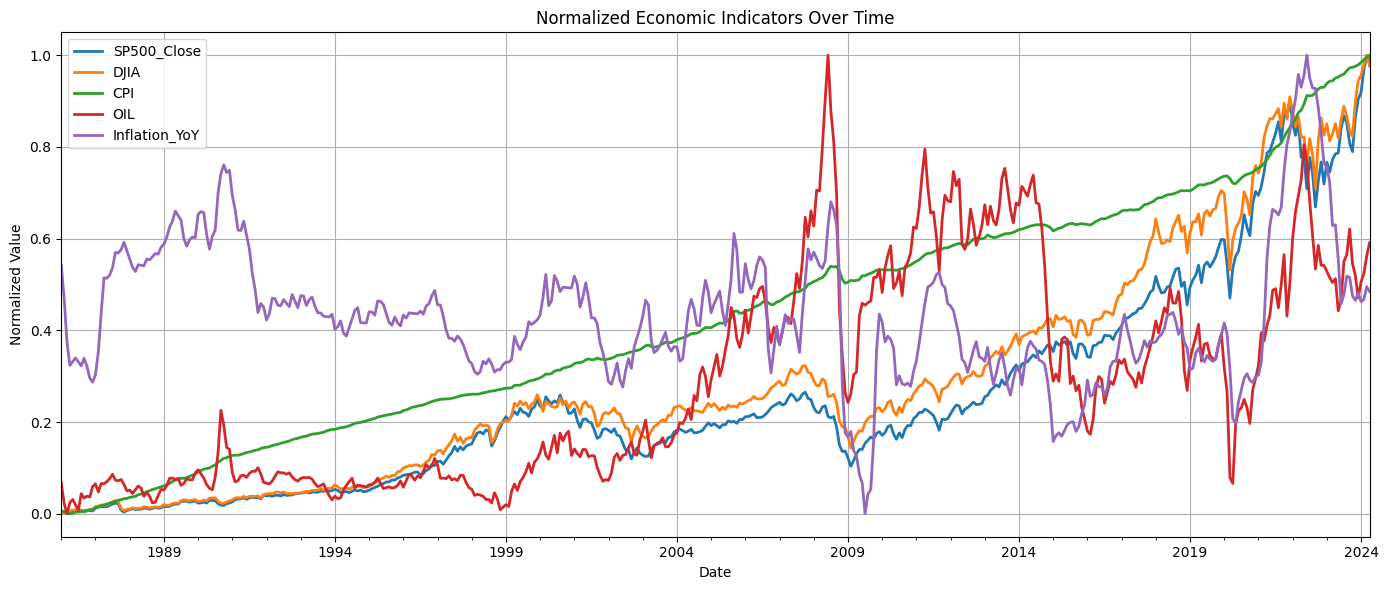

In [ ]:
df_plot = sp500_monthly.set_index('Date')

# Normalize the numeric columns to [0, 1] scale
df_normalized = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

# Plot all normalized series
df_normalized.plot(figsize=(14, 6), linewidth=2)
plt.title('Normalized Economic Indicators Over Time')
plt.ylabel('Normalized Value')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Although the p-value for the relationship between CPI indices and sub-indices and monthly S&P 500 returns slightly exceeds the conventional significance threshold of 0.05—meaning we cannot reject the null hypothesis—it is notably lower than the p-value observed for unemployment data. The difference may stem from the frequency of data reporting. CPI indices are typically available at a daily or monthly level, making it more aligned with short-term market movements. In contrast, unemployment figures are often released monthly or annually, potentially limiting their effectiveness in capturing more immediate shifts in investor behavior. As a result, while CPI data does not produce statistically significant results here, it still appears to offer more timely and relevant signals than traditional macroeconomic indicators like unemployment.


***Linear Regression***

In [ ]:
df = sp500_monthly.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df['SP500_Return'] = df['SP500_Close'].pct_change()


In [ ]:
df['SP500_Return'] = df['SP500_Close'].pct_change()

In [ ]:
features = ['DJIA', 'CPI', 'OIL', 'Inflation_YoY']
target = 'SP500_Return'

df=df.dropna()
X = df[features]
y = df[target]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

coefficients = pd.Series(lr.coef_, index=features)
print("\nFeature Coefficients:")
print(coefficients.sort_values(ascending=False))

Linear Regression Results
MSE: 0.0019878502728713256
R² Score: 0.07928013678510737

Feature Coefficients:
OIL              0.000362
DJIA             0.000003
CPI             -0.000779
Inflation_YoY   -0.007570
dtype: float64


R^2 is about 7.9% which is quite low, indicating that the model isn't able to explain much of the variation in the data. However, the value of MSE is low suggesting that the model's prediction is closer to the actual value but it's not the only metric we need to consider. In addition, inflation and CPI showed negative relationships with S&P 500 return.

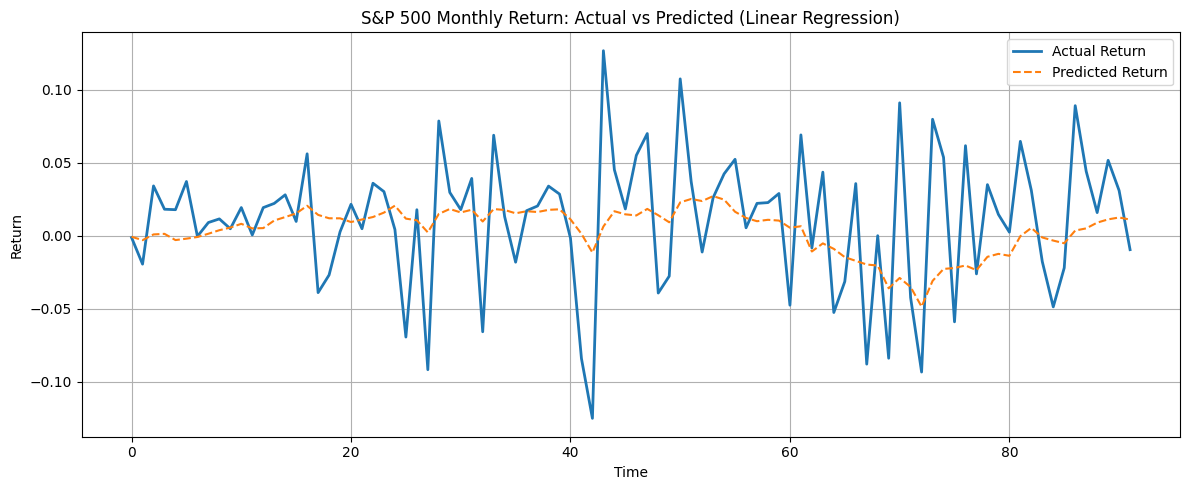

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual Return', linewidth=2)
plt.plot(y_pred, label='Predicted Return', linestyle='--')
plt.title('S&P 500 Monthly Return: Actual vs Predicted (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*Add Lag Features*

In [ ]:
df['SP500_Return_Lag1'] = df['SP500_Return'].shift(1)
df['SP500_Return_Lag2'] = df['SP500_Return'].shift(2)
df['SP500_Return_Lag1Q'] = df['SP500_Return'].shift(3)

df = df.dropna()

X = df[['DJIA', 'CPI', 'OIL', 'Inflation_YoY', 'SP500_Return_Lag1', 'SP500_Return_Lag2', 'SP500_Return_Lag1Q']]
y = df['SP500_Return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred=linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Results")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Linear Regression Results
MSE: 0.0019657292018325674
R² Score: 0.0895260339630437


**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Results")
print(f"MSE: {mse_rf}")
print(f"R² Score: {r2_rf}")

Random Forest Results
MSE: 0.00269749386500316
R² Score: -0.1823306856876128


Directional accuracy

In [ ]:
actual_direction = (y_test > 0).astype(int)
predicted_direction = (y_pred > 0).astype(int)

# Calculate accuracy
directional_accuracy = np.mean(actual_direction == predicted_direction)
print(f"Directional Accuracy: {directional_accuracy:.2%}")

Directional Accuracy: 70.93%


The model correctly predicted whether the S&P return would go up or down 70.93% of the time. However, R^2 shows poor prediction of the magnitude returns.


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression Results")
print(f"MSE: {mse_ridge}")
print(f"R² Score: {r2_ridge}")


Ridge Regression Results
MSE: 0.001605196185697334
R² Score: 0.08144458639571184


In [ ]:
# Directional accuracy
actual_dir = (y_test > 0).astype(int)
predicted_dir = (y_pred_ridge > 0).astype(int)

directional_acc_ridge = np.mean(actual_dir == predicted_dir)
print(f" Directional Accuracy (Ridge): {directional_acc_ridge:.2%}")


 Directional Accuracy (Ridge): 70.80%


Feature Importance in S&P 500 prediction

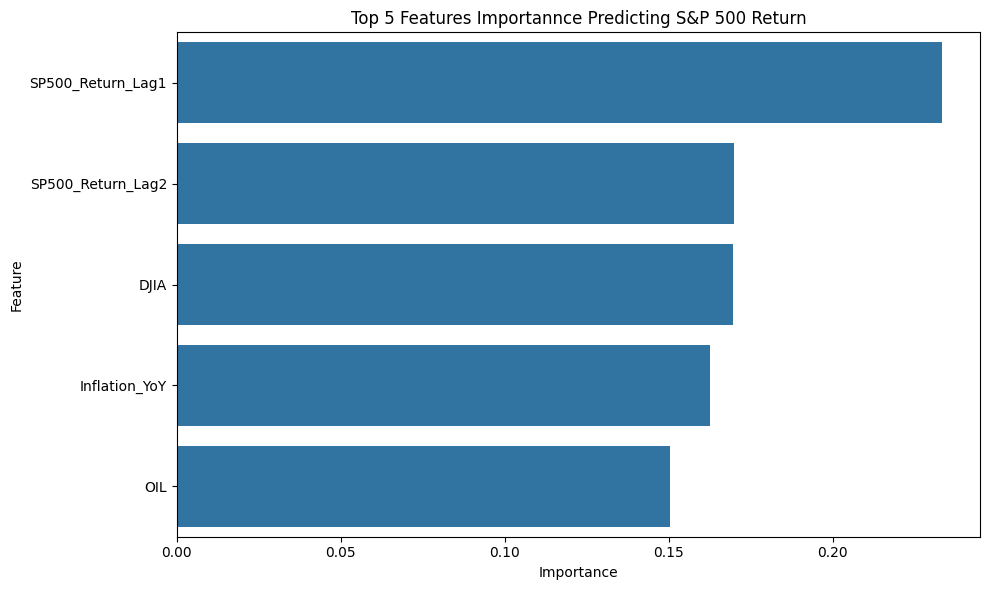

In [ ]:


X = df[['DJIA', 'CPI', 'OIL', 'Inflation_YoY', 'SP500_Return_Lag1', 'SP500_Return_Lag2']]
y = df['SP500_Return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


feature_importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False),
plt.title('Top 5 Features Importannce Predicting S&P 500 Return')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The above graph shows the top 5 features in predicting S&P 500 returns, and the first lag of the S&P 500 return is the most important feature.